In [84]:
import spikeinterface as si
import spikeinterface.extractors as se 
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.widgets as sw

import os

import probeinterface as pi
from probeinterface.plotting import plot_probe

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

import spikeinterface_gui as sigui

import warnings
warnings.simplefilter("ignore")

%matplotlib widget

In [85]:
probe_path=r'\\equipe2-nas1\Gilles.DELBECQ\Data\ePhy\Cohorte 1\Si_analysis/CM16_Buz_Sparse.json'

# Working folder path
working_dir=r'\\equipe2-nas1\Gilles.DELBECQ\Data\ePhy\Cohorte 1\Si_analysis/'

if os.path.exists(working_dir)==False:
    os.makedirs(working_dir)
os.chdir(working_dir)

freq_min = 300
freq_max = 3000

In [86]:
# parameters to load the bin/dat format
num_channels = 16
sampling_frequency = 20000
gain_to_uV = 0
offset_to_uV = 0
dtype = "float64"
time_axis = 0

In [87]:
recordings = [  
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-24/raw/0004_07_0007_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-24/raw/0004_07_0008_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-24/raw/0004_07_0009_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-24/raw/0004_07_0010_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-24/raw/0004_07_0011_20000Hz.rbf",

"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-20/raw/0004_06_01_0001_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-20/raw/0004_06_01_0002_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-20/raw/0004_06_01_0003_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-20/raw/0004_06_01_0004_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-20/raw/0004_06_01_0005_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-20/raw/0004_06_01_0006_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-20/raw/0004_06_01_0007_20000Hz.rbf",

"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0012_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0001_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0002_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0003_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0004_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0005_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0006_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0007_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0008_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0009_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0010_20000Hz.rbf",
"//equipe2-nas1/Gilles.DELBECQ/Data/ePhy/Cohorte 1/RBF/10-19/raw/0004_05_0011_20000Hz.rbf"
]

In [88]:
recordings_list=[]
for recording_file in recordings:
    recording = si.read_binary(recording_file, num_chan=num_channels, sampling_frequency=sampling_frequency,
                               dtype=dtype, gain_to_uV=gain_to_uV, offset_to_uV=offset_to_uV, 
                               time_axis=time_axis)
    recording.annotate(is_filtered=False)
    recordings_list.append(recording)

multirecording = si.concatenate_recordings(recordings_list)

(<matplotlib.collections.PolyCollection at 0x124ed624ee0>, None)

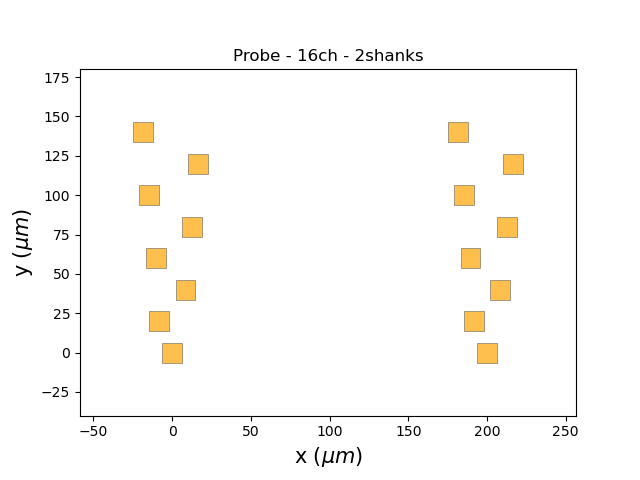

In [89]:
#Set the probe
probe = pi.io.read_probeinterface(probe_path)
probe = probe.probes[0]
multirecording = multirecording.set_probe(probe)
plot_probe(probe)

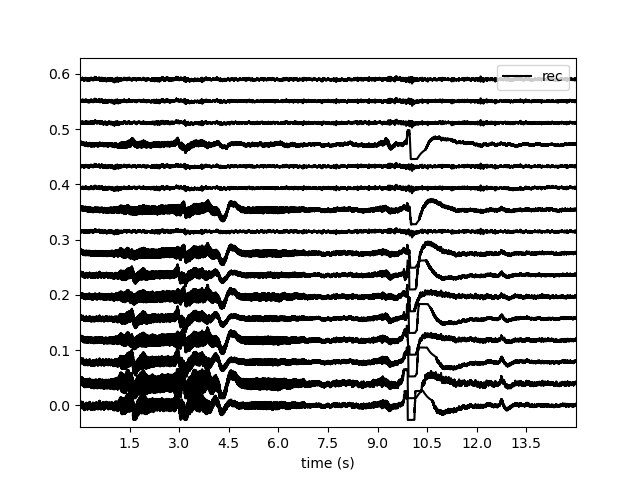

In [90]:
"""Defective sites exclusion"""
#Check the defective sites
sw.plot_timeseries(multirecording, channel_ids=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],time_range=[0,15])

In [91]:
#Exclude defective sites
#multirecording.set_channel_groups(1, [8,10,11,13,14,15])
multirecording.set_channel_groups(1, [8,10,11,13,14,15])
multirecording = multirecording.split_by('group')[1]

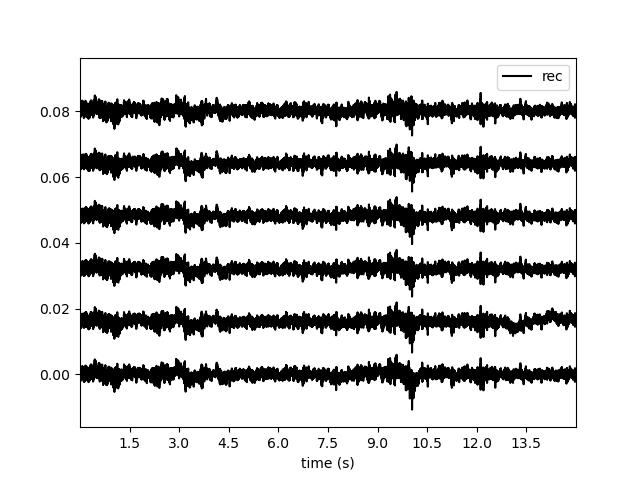

In [92]:
w = sw.plot_timeseries(multirecording,time_range=[0,15])

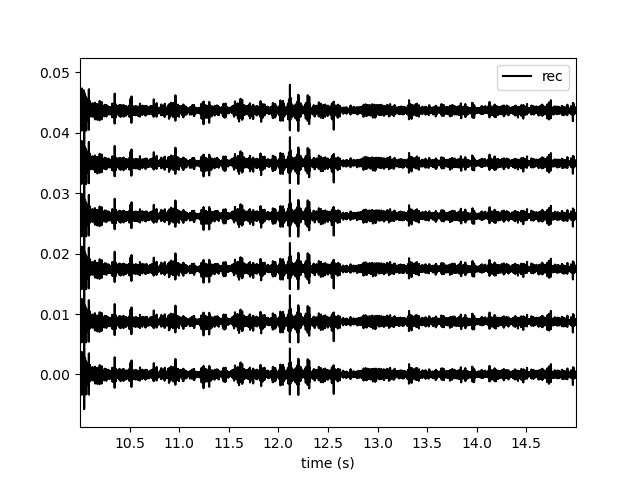

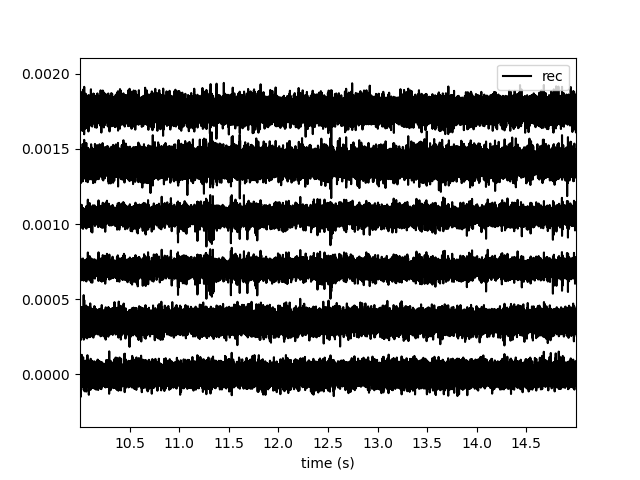

In [93]:
"""Pre Processing"""
#Bandpass filter
recording_f = spre.bandpass_filter(multirecording, freq_min=freq_min, freq_max=freq_max)
w = sw.plot_timeseries(recording_f,time_range=[10,15], segment_index=0)


#Median common ref
recording_cmr = spre.common_reference(recording_f, reference='global', operator='median')
w = sw.plot_timeseries(recording_cmr,time_range=[10,15], segment_index=0)

In [96]:
job_kwargs = dict(n_jobs=4, chunk_duration="1s", progress_bar=True)
recording_saved = recording_cmr.save(folder="04_5to7", **job_kwargs)
recording_saved

write_binary_recording with n_jobs = 4 and chunk_size = 20000


write_binary_recording:   0%|          | 0/983 [00:00<?, ?it/s]

BinaryFolderRecording: 6 channels - 1 segments - 20.0kHz - 982.474s

In [97]:
print(f'Cached channels ids: {recording_saved.get_channel_ids()}')
print(f'Channel groups after caching: {recording_saved.get_channel_groups()}')

Cached channels ids: [ 8 10 11 13 14 15]
Channel groups after caching: [1 1 1 1 1 1]
